# Project for: UC3M Class - Optimization and Decision Analytics
Author: Simon Schmetz

*Required Libraries*
pip install matplotlib networkx


In [109]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random

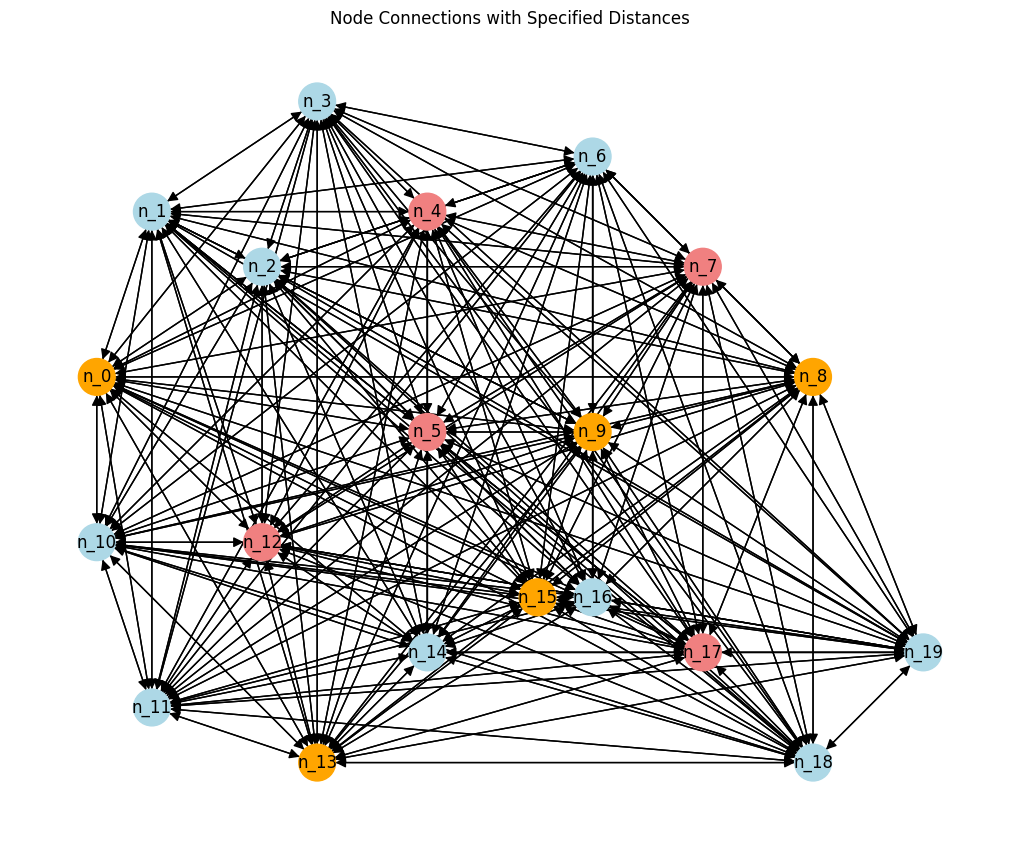

In [110]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes
n_nodes = 20

# Create a list for connections
nodes = range(n_nodes)
connections = [(f'n_{m}', f'n_{n}') for m in range(n_nodes) for n in range(n_nodes) if m != n]

# Create a directed graph
G = nx.DiGraph()

# Add edges from the connections list
G.add_edges_from(connections)

# Manually specify positions of nodes (coordinates reflect their distance)
positions = {
    'n_0': (2, 10),
    'n_1': (3, 13),
    'n_2': (5, 12),
    'n_3': (6, 15),
    'n_4': (8, 13),  # Main node
    'n_5': (8, 9),   # Main node
    'n_6': (11, 14),
    'n_7': (13, 12), # Main node
    'n_8': (15, 10),
    'n_9': (11, 9),
    'n_10': (2, 7),
    'n_11': (3, 4),
    'n_12': (5, 7),  # Main node
    'n_13': (6, 3),
    'n_14': (8, 5),
    'n_15': (10, 6),
    'n_16': (11, 6),
    'n_17': (13, 5), # Main node
    'n_18': (15, 3),
    'n_19': (17, 5)
}

# Create a list of demands (randomly generated for illustration)
demands = [random.randint(200, 400) for _ in range(len(connections))]

# Define main nodes that have 4 times demand
main_nodes = {'n_4', 'n_5', 'n_7', 'n_12', 'n_17'}
medium_nodes = {'n_9','n_15','n_13','n_0','n_8'}


# Pair each connection with a demand, adjusting for main and medium nodes
connection_demands = []
for connection, demand in zip(connections, demands):
    if connection[0] in main_nodes or connection[1] in main_nodes:
        demand *= 4  # Double the demand for connections involving main nodes
    if connection[0] in medium_nodes or connection[1] in medium_nodes:
        demand *= 2  # Double the demand for connections involving medium nodes
    connection_demands.append((connection, demand))

# Create a dictionary for easy access to demands
demand_dict = {conn: demand for conn, demand in connection_demands}

# Plot the graph with specified distances between nodes
plt.figure(figsize=(10, 8))

# Determine colors for nodes based on whether they are main nodes or not
node_colors = ['lightcoral' if node in main_nodes else 'orange' if node in medium_nodes else 'lightblue' for node in G.nodes()]
node_color_dict = {node: color for node, color in zip(G.nodes(), node_colors)}

nx.draw(G, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
plt.title("Node Connections with Specified Distances")
plt.show()


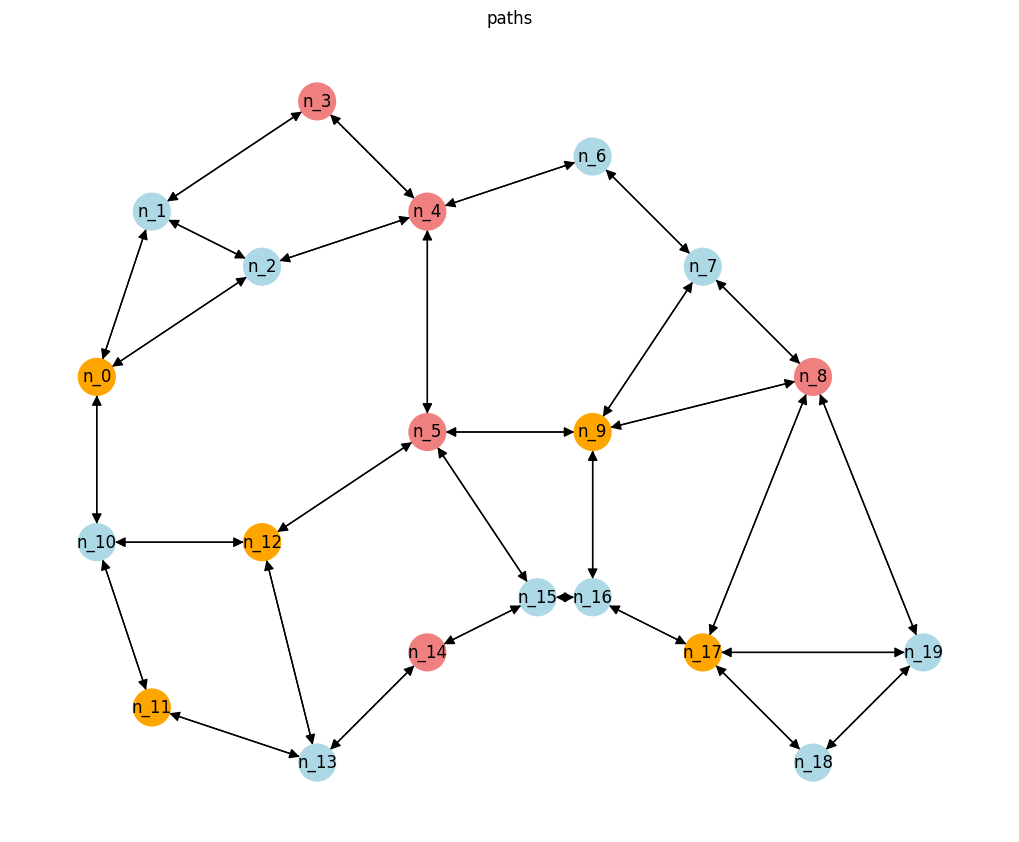

In [111]:

# Function to calculate Euclidean distance between two nodes
def euclidean_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

# Create a list for closest 3 connections for each node
closest_connections = []

# # Find the closest 3 nodes for each node
# for n_m in positions:
#     # Calculate distances to all other nodes
#     distances = [(n_n, euclidean_distance(positions[n_m], positions[n_n])) for n_n in positions if n_m != n_n]
    
#     # Sort based on distance and select the closest 3 nodes
#     distances.sort(key=lambda x: x[1])
#     closest_nodes = [node for node, dist in distances[:3]]
    
#     # Add connections (both ways)
#     for n_n in closest_nodes:
#         if (n_n, n_m) not in closest_connections:  # Avoid duplicate connections
#             closest_connections.append((n_m, n_n))
#             closest_connections.append((n_n, n_m))

paths = [('n_0', 'n_10'),
    ('n_10', 'n_0'),
    ('n_0', 'n_1'),
    ('n_1', 'n_0'),
    ('n_0', 'n_2'),
    ('n_2', 'n_0'),
    ('n_1', 'n_2'),
    ('n_2', 'n_1'),
    ('n_1', 'n_3'),
    ('n_3', 'n_1'),
    ('n_2', 'n_4'),
    ('n_4', 'n_2'),
    ('n_3', 'n_4'),
    ('n_4', 'n_3'),
    ('n_4', 'n_6'),
    ('n_6', 'n_4'),
    ('n_5', 'n_9'),
    ('n_9', 'n_5'),
    ('n_5', 'n_12'),
    ('n_12', 'n_5'),
    ('n_5', 'n_15'),
    ('n_15', 'n_5'),
    ('n_6', 'n_7'),
    ('n_7', 'n_6'),
    ('n_9', 'n_7'),
    ('n_7', 'n_9'),
    ('n_4', 'n_5'),
    ('n_5', 'n_4'),
    ('n_7', 'n_8'),
    ('n_8', 'n_7'),
    ('n_8', 'n_9'),
    ('n_9', 'n_8'),
    ('n_8', 'n_17'),
    ('n_17', 'n_8'),
    ('n_9', 'n_16'),
    ('n_16', 'n_9'),
    ('n_10', 'n_12'),
    ('n_12', 'n_10'),
    ('n_10', 'n_11'),
    ('n_11', 'n_10'),
    ('n_11', 'n_13'),
    ('n_13', 'n_11'),
    ('n_13', 'n_14'),
    ('n_14', 'n_13'),
    ('n_13', 'n_12'),
    ('n_12', 'n_13'),
    ('n_14', 'n_15'),
    ('n_15', 'n_14'),
    ('n_15', 'n_16'),
    ('n_16', 'n_15'),
    ('n_16', 'n_17'),
    ('n_17', 'n_16'),
    ('n_17', 'n_18'),
    ('n_18', 'n_17'),
    ('n_18', 'n_19'),
    ('n_19', 'n_18'),
    ('n_19', 'n_17'),
    ('n_17', 'n_19'),
    ('n_19', 'n_8'),
    ('n_8', 'n_19')]



# Create a directed graph for the closest connections
G_closest = nx.DiGraph()
G_closest.add_edges_from(paths)

# Plot the graph with specified distances between nodes
plt.figure(figsize=(10, 8))
nx.draw(G_closest, pos=positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
plt.title("paths")
plt.show()

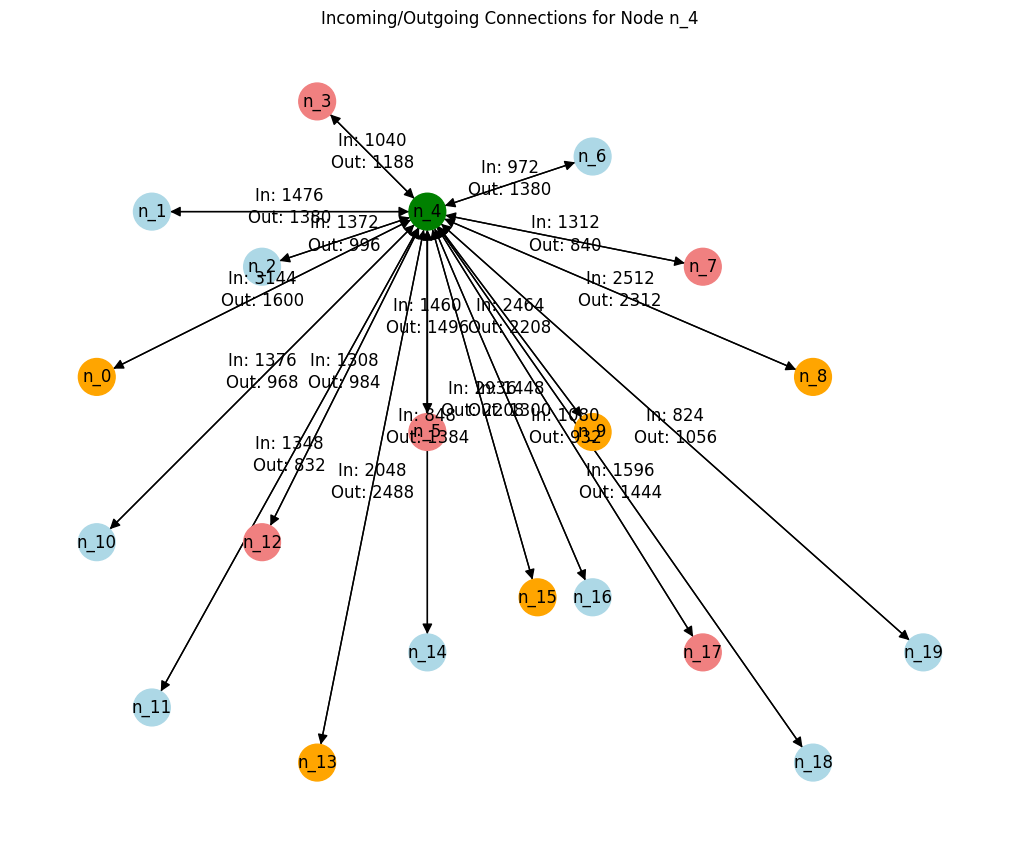

In [112]:

def plot_node_connections(node):
    """Plots incoming and outgoing connections for a specified node."""
    incoming_edges = G.in_edges(node)
    outgoing_edges = G.out_edges(node)
    
    # Filter connections and their demands for the specified node
    filtered_edges = list(incoming_edges) + list(outgoing_edges)
    filtered_demands = [demand_dict[edge] for edge in filtered_edges]

    # Create a new graph for the filtered edges
    H = nx.DiGraph()
    H.add_edges_from(filtered_edges)

    # Create a new positions dictionary
    filtered_positions = {node: positions[node]}  # Position of the specified node
    for edge in filtered_edges:
        filtered_positions[edge[0]] = positions[edge[0]]
        filtered_positions[edge[1]] = positions[edge[1]]

    # Plot the graph with the filtered connections
    plt.figure(figsize=(10, 8))

    # Highlight the central node
    central_node_color = 'green'  # Color for the central node
    node_colors[list(H.nodes()).index(node)] = central_node_color
    nx.draw(H, pos=filtered_positions, with_labels=True, node_size=700, node_color=node_colors, arrowsize=15)
    plt.title(f"Incoming/Outgoing Connections for Node {node}")
    
   # Display demands on the plot
    for edge, demand in zip(incoming_edges, filtered_demands[:len(incoming_edges)]):
        x_start, y_start = filtered_positions[edge[0]]
        x_end, y_end = filtered_positions[edge[1]]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2 + 0.2, f"In: {demand}", fontsize=12, color='black', ha='center')
    
    for edge, demand in zip(outgoing_edges, filtered_demands[len(incoming_edges):]):
        x_start, y_start = filtered_positions[edge[0]]
        x_end, y_end = filtered_positions[edge[1]]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2 - 0.2, f"Out: {demand}", fontsize=12, color='black', ha='center')

    plt.show()

# Example: Plot connections for node 'n_4'
plot_node_connections('n_4')

# optimization